# TlWall

## transmission line model for wall impedance calculations
### Authors: Carlo Zannini and Tatiana Rijoff

### Needed steps:
- define the beam 
- define the frequencies
- define the chamber
-- define the different layers for the chamber

In [1]:
import pytlwall
import pandas as pd
import pytlwall.plot_util as plot

## Beam
Define the beam characteristics.
### Input:
Beam(Ekin_MeV, p_MeV_c, betarel, gammarel, test_beam_shift, mass_MeV_c2)
                 

In [2]:
beam = pytlwall.Beam(betarel=0.9, test_beam_shift=0.002)

## Frequency
Define the frequency characteristics. You can insert a list of frequencies (in Hz) or define the exponential parameter for frequencies calculation (minimum frequency, maximum frequencies and frequency step)
### Input:
Frequencies(freq_list, fmin, fmax, fstep)

In [3]:
freq = pytlwall.Frequencies(fmin=2, fmax=8, fstep=2)

## Chamber
Define the chamber characteristics.
### Input:
Chamber(pipe_len_m, pipe_rad_m, pipe_hor_m, pipe_ver_m, chamber_shape, betax, betay, layers, component_name)

### Layer
Define the layer characteristics
#### Input
Layer(layer_type, thick_m, muinf_Hz, epsr, sigmaDC, k_Hz, tau, RQ, freq_Hz, boundary)

In [4]:
layers = []
layer0 = pytlwall.Layer(layer_type='CW',
                        thick_m=0.1,
                        muinf_Hz=0.,
                        epsr=1.,
                        sigmaDC=1.e6,
                        k_Hz=float('inf'),
                        tau=0.,
                        RQ=0.,
                        boundary=False)
layers.append(layer0)
boundary = pytlwall.Layer(layer_type='V', boundary=True)
layers.append(boundary)

In [5]:
pipe_len_m = 1.
pipe_rad_m = 0.0184
chamber_shape = 'CIRCULAR'
betax = 1.
betay = 1.
component_name = 'newCW'

chamber = pytlwall.Chamber(pipe_len_m=pipe_len_m,
                           pipe_rad_m=pipe_rad_m,
                           chamber_shape=chamber_shape,
                           betax=betax,
                           betay=betay,
                           layers=layers,
                           component_name=component_name)

## Run TlWall

In [6]:
mywall = pytlwall.TlWall(chamber, beam, freq)
ZLong = mywall.ZLong
ZTrans = mywall.ZTrans
ZDipX = mywall.ZDipX
ZDipY = mywall.ZDipY
ZQuadX = mywall.ZQuadX
ZQuadY = mywall.ZQuadY
ZLongSurf = mywall.ZLongSurf
ZTransSurf = mywall.ZTransSurf
ZLongISC = mywall.ZLongISC
ZTransISC = mywall.ZTransISC
ZLongDSC = mywall.ZLongDSC
ZTransDSC = mywall.ZTransDSC

 ## save the data in a dataframe
 Choose what you want to save

In [9]:
savedir = 'examples/ex_without_cfg001/output/'
data = {'f': mywall.f,
        'ZLong real': mywall.ZLong.real, 'ZLong imag': mywall.ZLong.imag,
        'ZTrans real': mywall.ZTrans.real, 'ZTrans imag': mywall.ZTrans.imag,
        'ZDipX real': mywall.ZDipX.real, 'ZDipX imag': mywall.ZDipX.imag,
        'ZDipY real': mywall.ZDipY.real, 'ZDipY imag': mywall.ZDipY.imag,
        'ZQuadX real': mywall.ZQuadX.real, 'ZQuadX imag': mywall.ZQuadX.imag,
        'ZQuadY real': mywall.ZQuadY.real, 'ZQUadY imag': mywall.ZQuadY.imag,
        'ZLongSurf real': mywall.ZLongSurf.real, 'ZLongSurf imag': mywall.ZLongSurf.imag,
        'ZTransSurf real': mywall.ZTransSurf.real, 'ZTransSurf imag': mywall.ZTransSurf.imag,
        'ZLongISC real': mywall.ZLongISC.real, 'ZLongISC imag': mywall.ZLongISC.imag,
        'ZTransISC real': mywall.ZTransISC.real, 'ZTransISC imag': mywall.ZTransISC.imag,
        'ZLongDSC real': mywall.ZLongDSC.real, 'ZLongDSC imag': mywall.ZLongDSC.imag,
        'ZTransDSC real': mywall.ZTransDSC.real, 'ZTransDSC imag': mywall.ZTransDSC.imag,}
df = pd.DataFrame(data)
df.to_excel(savedir + 'output.xlsx')

## Example of plot

ZLong.png
ZTrans.png


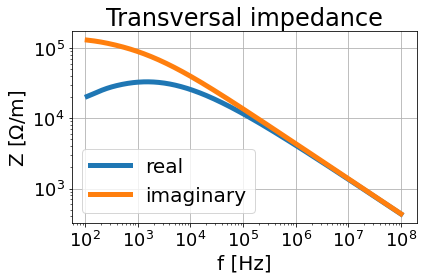

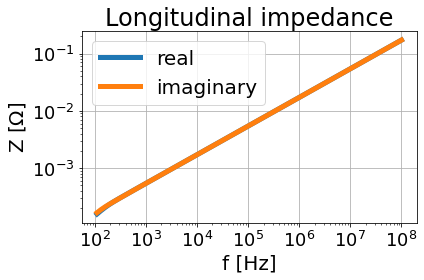

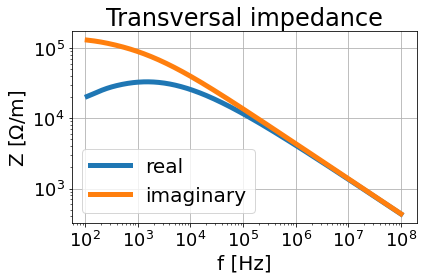

In [10]:
savedir = 'examples/ex_without_cfg001/img/'
savename = 'ZLong.png'
title = 'Longitudinal impedance'
plot.plot_Z_vs_f_simple(mywall.f, mywall.ZLong, 'L', title,
                        savedir, savename,
                        xscale='log', yscale='log')

savename = 'ZTrans.png'
title = 'Transversal impedance'
plot.plot_Z_vs_f_simple(mywall.f, mywall.ZTrans, 'T', title,
                        savedir, savename,
                        xscale='log', yscale='log')
